# ARIMA vs Prophet 비교

In [1]:
!pip install pmdarima

In [2]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
from pmdarima import auto_arima                        
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
import warnings
warnings.filterwarnings("ignore")
%config InlineBackend.figure_format = 'retina'

In [3]:
#Read the dataset
df = pd.read_csv('https://raw.githubusercontent.com/krishvictor77/Time-Series-Forecasting-ARIMA-vs-Prophet/master/monthly-beer-production-in-austr.csv')
print(df.shape)
df.head()

(476, 2)


,Month,Monthly_Prod
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9


In [4]:
df.Month = pd.to_datetime(df.Month)
df = df.set_index("Month")
df.head()

,Monthly_Prod
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9


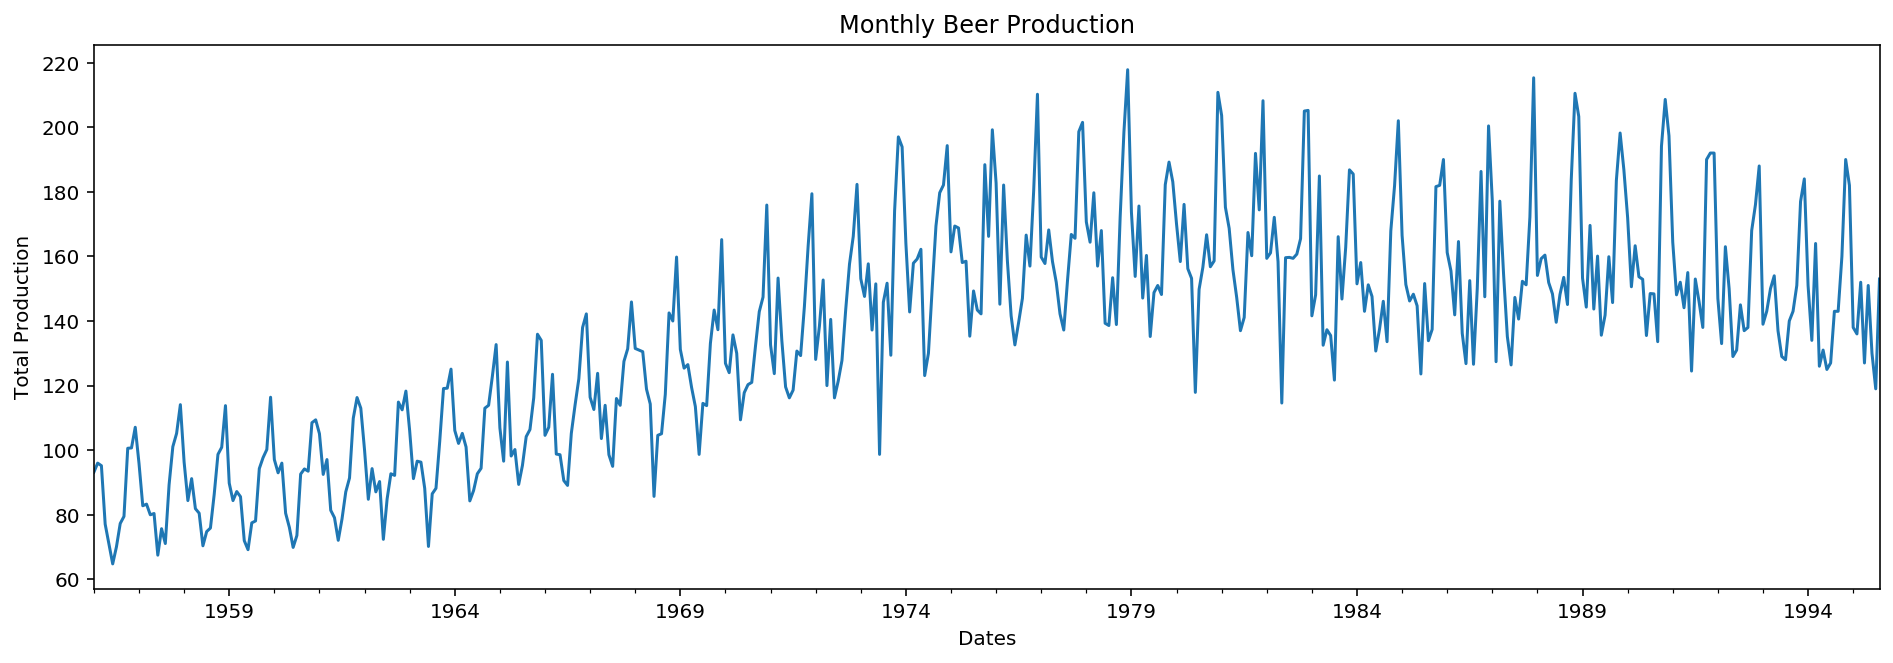

In [5]:
df.index.freq = 'MS'
ax = df['Monthly_Prod'].plot(figsize = (16,5), title = "Monthly Beer Production")
ax.set(xlabel='Dates', ylabel='Total Production');

- 선형모델로 예측하면?

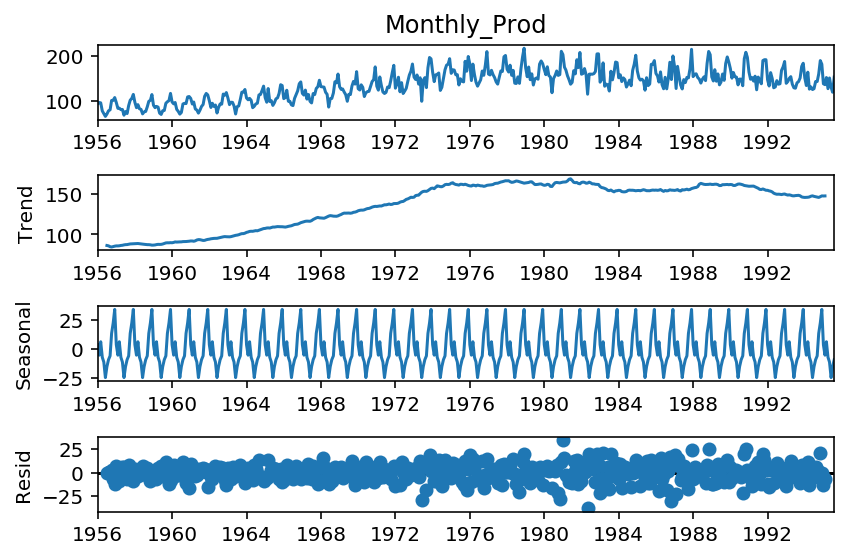

In [6]:
#Seasonal Decompose Plots
a = seasonal_decompose(df["Monthly_Prod"], model = "add")
a.plot();

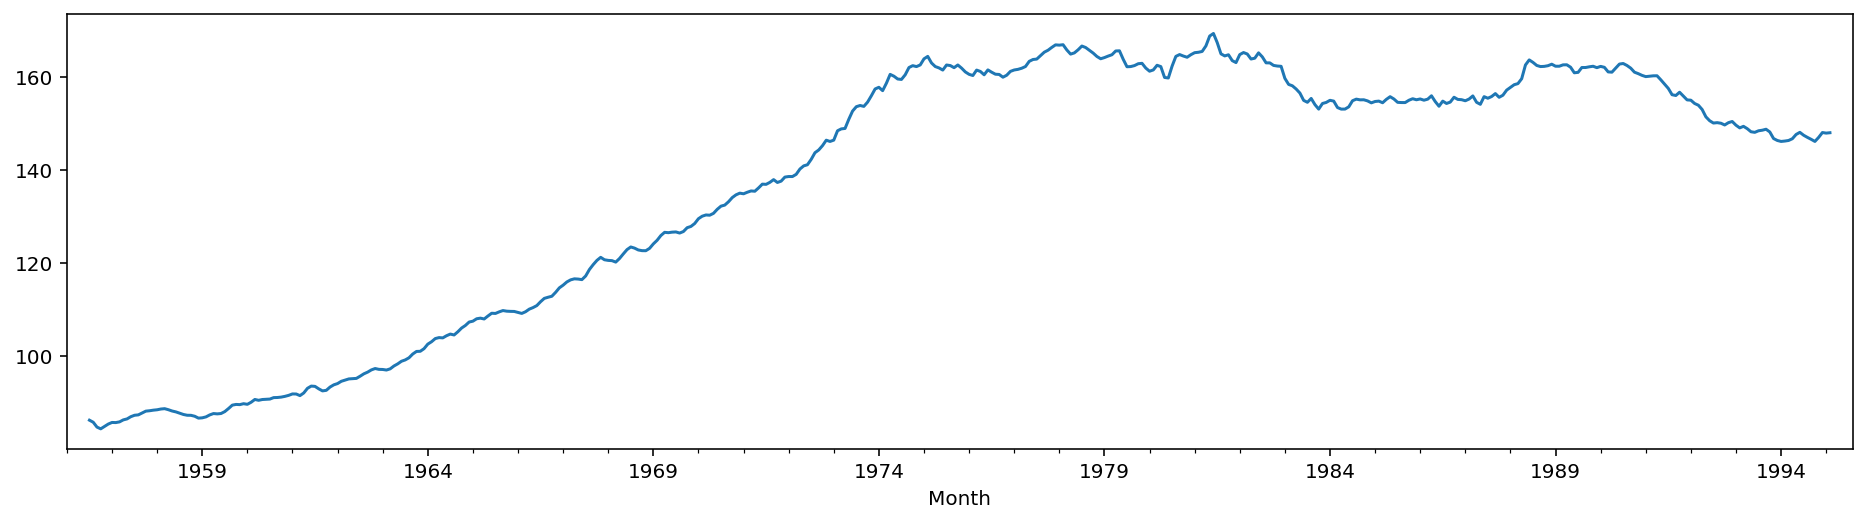

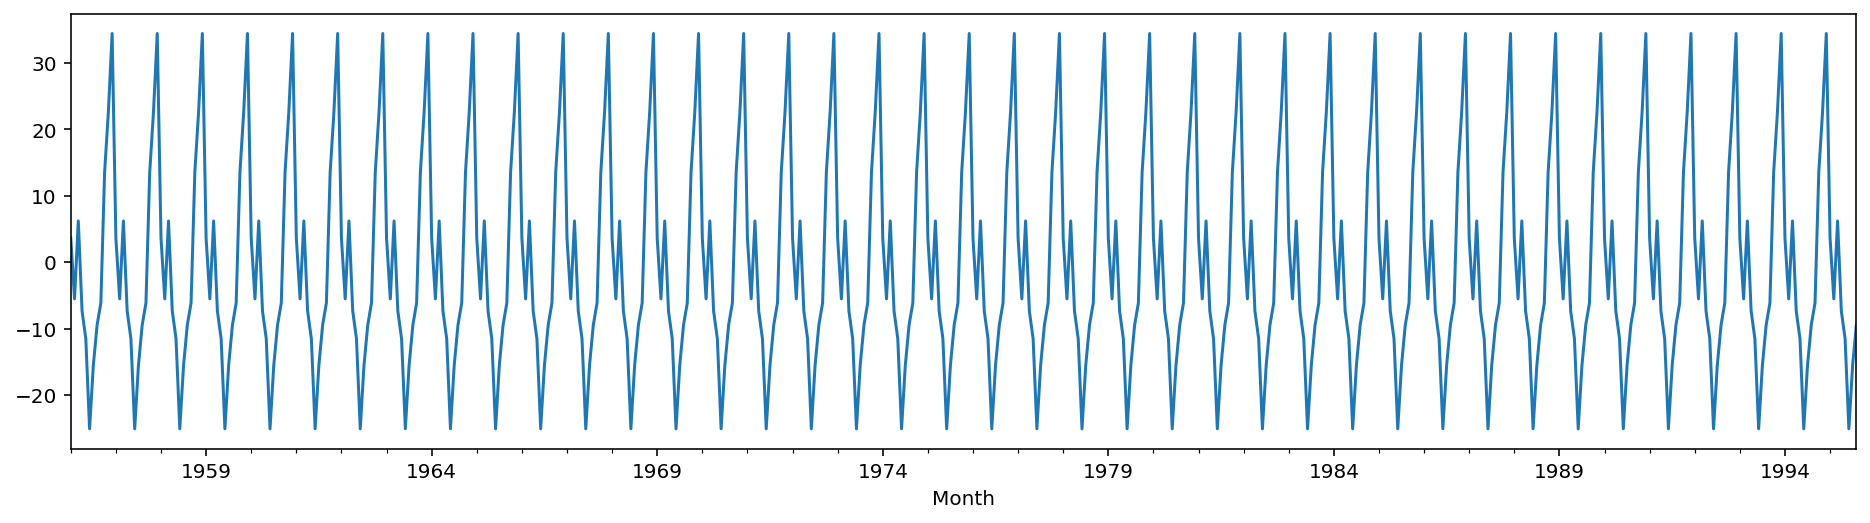

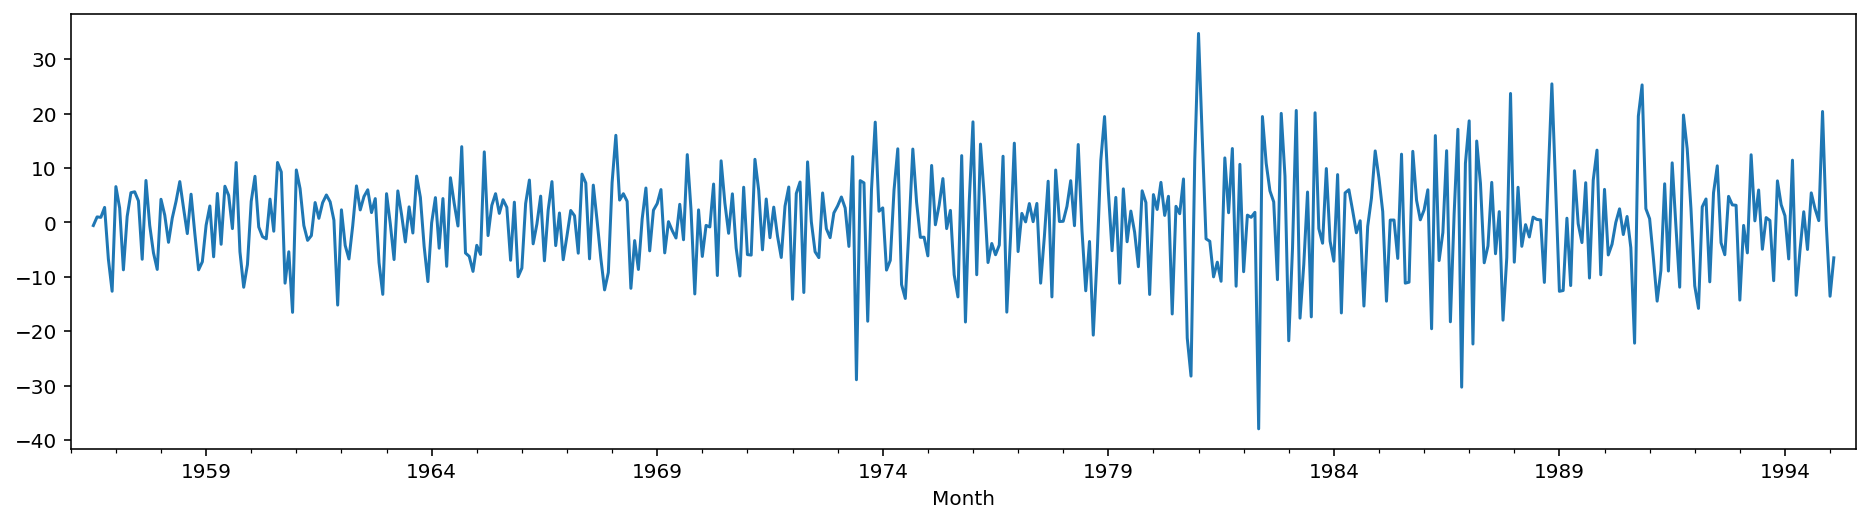

In [7]:
import matplotlib.pyplot as plt
# plt.figure(figsize = (16,4))
a.trend.plot(figsize = (16,4)); plt.show()
a.seasonal.plot(figsize = (16,4)); plt.show()
a.resid.plot(figsize = (16,4)); plt.show()

# ARIMA

In [6]:
#Finding the best values for p,q,d,P,Q,D
auto_arima(df['Monthly_Prod'], seasonal=True, m=12,max_p=4, max_d=1,max_q=4, max_P=4, max_D=1,max_Q=4).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  476
Model:             SARIMAX(3, 1, 4)x(1, 0, [1, 2], 12)   Log Likelihood               -1729.586
Date:                                 Tue, 06 Oct 2020   AIC                           3481.172
Time:                                         11:31:52   BIC                           3526.968
Sample:                                              0   HQIC                          3499.181
                                                 - 476                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3006      0.042     -7.195      0.000      -0.383      -0.219
ar.L2         -0.0163      0.048     -0.338      0.735      -0.111       0.078
ar.L3          0.8442      0.042     19.938      0.000       0.761       0.927
ma.L1         -0.7450      0.029    -25.507      0.000      -0.802      -0.688
ma.L2         -0.2017      0.023     -8.640      0.000      -0.247      -0.156
ma.L3         -0.8056      0.022    -36.992      0.000      -0.848      -0.763
ma.L4          0.8727      0.026     33.746      0.000       0.822       0.923
ar.S.L12       0.9914      0.005    180.756      0.000       0.981       1.002
ma.S.L12      -0.8402      0.048    -17.683      0.000      -0.933      -0.747
ma.S.L24       0.0583      0.047      1.252      0.211      -0.033       0.150
sigma2        79.6794      4.392     18.143      0.000      71.072      88.287
===================================================================================
Ljung-Box (Q):                       52.45   Jarque-Bera (JB):                66.15
Prob(Q):                              0.09   Prob(JB):                         0.00
Heteroskedasticity (H):               2.77   Skew:                            -0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [9]:
train_data = df[:len(df)-12]
test_data = df[len(df)-12:]
arima_model = SARIMAX(train_data['Monthly_Prod'], order = (3,1,5), seasonal_order = (1,0,1,12))
arima_result = arima_model.fit()
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                         Monthly_Prod   No. Observations:                  464
Model:             SARIMAX(3, 1, 5)x(1, 0, [1], 12)   Log Likelihood               -1684.445
Date:                              Sun, 04 Oct 2020   AIC                           3390.889
Time:                                      23:28:10   BIC                           3436.404
Sample:                                  01-01-1956   HQIC                          3408.807
                                       - 08-01-1994                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3782      0.052     -7.224      0.000      -0.481      -0.276
ar.L2         -0.1073      0.059     -1.803      0.071      -0.224       0.009
ar.L3          0.7507      0.052     14.466      0.000       0.649       0.852
ma.L1         -0.6089      0.057    -10.675      0.000      -0.721      -0.497
ma.L2         -0.2915      0.044     -6.683      0.000      -0.377      -0.206
ma.L3         -0.8073      0.032    -25.546      0.000      -0.869      -0.745
ma.L4          0.7099      0.055     12.792      0.000       0.601       0.819
ma.L5          0.1607      0.043      3.755      0.000       0.077       0.245
ar.S.L12       0.9928      0.005    192.933      0.000       0.983       1.003
ma.S.L12      -0.8025      0.038    -21.370      0.000      -0.876      -0.729
sigma2        77.7619      4.005     19.416      0.000      69.912      85.612
===================================================================================
Ljung-Box (Q):                       45.55   Jarque-Bera (JB):                80.69
Prob(Q):                              0.25   Prob(JB):                         0.00
Heteroskedasticity (H):               3.42   Skew:                            -0.30
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [10]:
#Train-Test split

train_data = df[:len(df)-12]
test_data = df[len(df)-12:]
arima_model = SARIMAX(train_data['Monthly_Prod'], order = (2,1,1), seasonal_order = (4,0,3,12))
arima_result = arima_model.fit()
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                         SARIMAX Results                                          
==================================================================================================
Dep. Variable:                               Monthly_Prod   No. Observations:                  464
Model:             SARIMAX(2, 1, 1)x(4, 0, [1, 2, 3], 12)   Log Likelihood               -1708.054
Date:                                    Sun, 04 Oct 2020   AIC                           3438.107
Time:                                            23:28:29   BIC                           3483.622
Sample:                                        01-01-1956   HQIC                          3456.025
                                             - 08-01-1994                                         
Covariance Type:                                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1232      0.043     -2.890      0.004      -0.207      -0.040
ar.L2         -0.1724      0.043     -3.993      0.000      -0.257      -0.088
ma.L1         -0.8430      0.028    -30.518      0.000      -0.897      -0.789
ar.S.L12       1.7536      0.117     14.929      0.000       1.523       1.984
ar.S.L24      -1.6054      0.225     -7.139      0.000      -2.046      -1.165
ar.S.L36       0.7847      0.178      4.404      0.000       0.435       1.134
ar.S.L48       0.0659      0.066      1.001      0.317      -0.063       0.195
ma.S.L12      -1.5521      0.126    -12.341      0.000      -1.799      -1.306
ma.S.L24       1.3855      0.207      6.688      0.000       0.979       1.792
ma.S.L36      -0.6552      0.121     -5.424      0.000      -0.892      -0.418
sigma2        84.0933      4.857     17.315      0.000      74.574      93.612
===================================================================================
Ljung-Box (Q):                       93.09   Jarque-Bera (JB):                41.17
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               4.07   Skew:                            -0.30
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [11]:
#Prediction
arima_pred = arima_result.predict(start = len(train_data), end = len(df)-1, typ="levels").rename("ARIMA Predictions")
arima_pred

1994-09-01    133.901284
1994-10-01    157.846290
1994-11-01    181.891142
1994-12-01    183.514877
1995-01-01    144.856134
1995-02-01    136.777627
1995-03-01    151.124454
1995-04-01    133.163644
1995-05-01    137.856397
1995-06-01    120.540125
1995-07-01    128.427779
1995-08-01    138.771287
Freq: MS, Name: ARIMA Predictions, dtype: float64

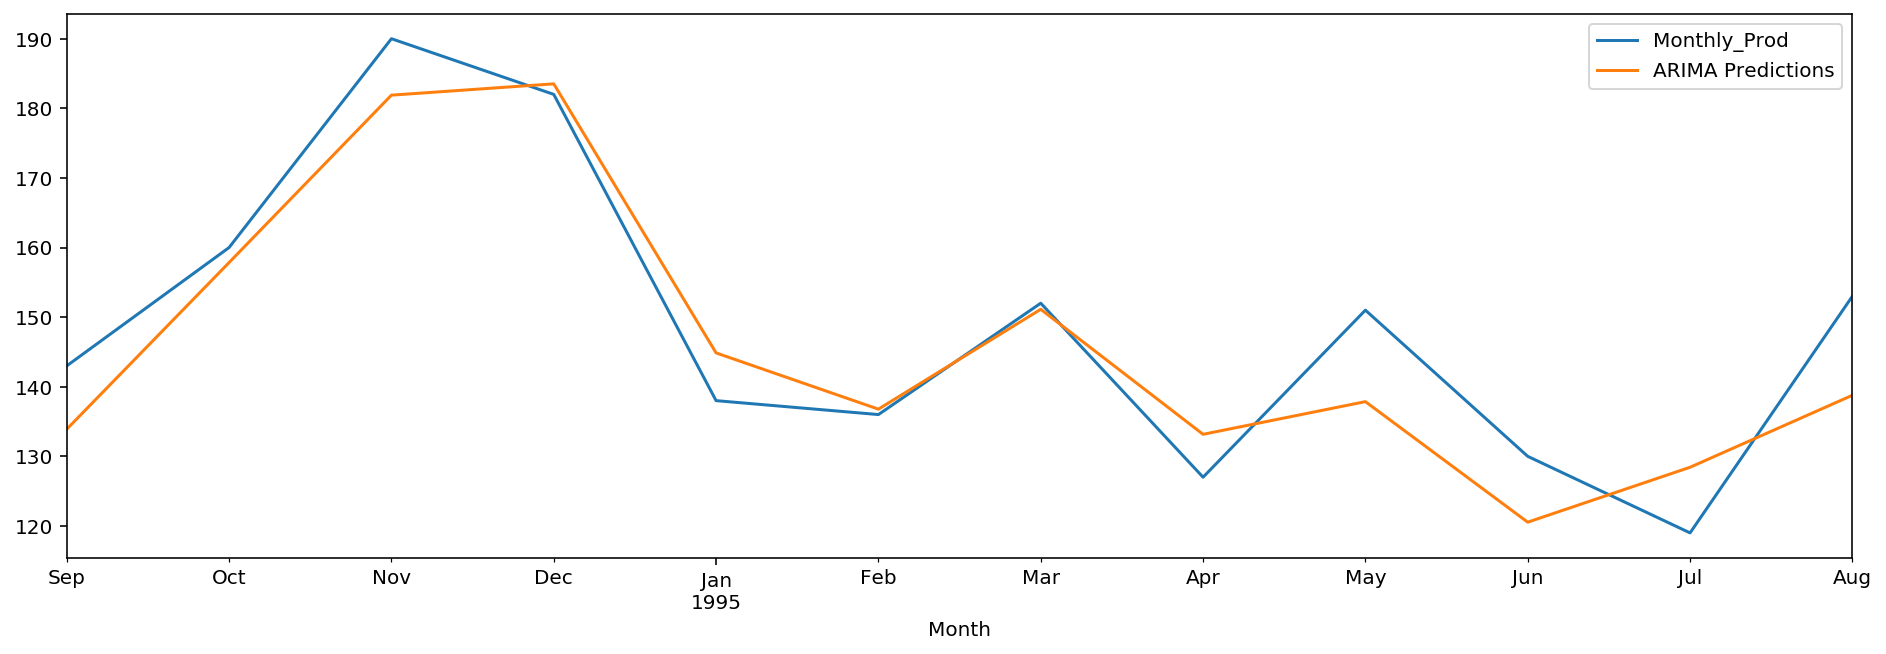

In [12]:
test_data['Monthly_Prod'].plot(figsize = (16,5), legend=True)
arima_pred.plot(legend = True);

In [13]:
#Model Evaluation
arima_rmse_error = rmse(test_data['Monthly_Prod'], arima_pred)
arima_mse_error = arima_rmse_error**2
mean_value = df['Monthly_Prod'].mean()

print(f'MSE Error: {arima_mse_error}\nRMSE Error: {arima_rmse_error}\nMean: {mean_value}')

MSE Error: 66.2853924295817
RMSE Error: 8.14158414742375
Mean: 136.39537815126045


In [14]:
test_data['ARIMA_Predictions'] = arima_pred

# Prophet

In [15]:

df_pr = df.copy()
df_pr = df.reset_index()
df_pr.columns = ['ds','y'] # To use prophet column names should be like that
train_data_pr = df_pr.iloc[:len(df)-12]
test_data_pr = df_pr.iloc[len(df)-12:]

In [16]:
from fbprophet import Prophet
m = Prophet()
m.fit(train_data_pr)
future = m.make_future_dataframe(periods=12,freq='MS')
prophet_pred = m.predict(future)
prophet_pred.tail()

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
471,1995-04-01,151.107067,130.681634,155.095205,151.071913,151.162161,-7.945561,-7.945561,-7.945561,-7.945561,-7.945561,-7.945561,0.0,0.0,0.0,143.161506
472,1995-05-01,151.043437,127.041551,152.195400,150.990433,151.122530,-11.391780,-11.391780,-11.391780,-11.391780,-11.391780,-11.391780,0.0,0.0,0.0,139.651658
473,1995-06-01,150.977686,114.095225,139.363792,150.901481,151.079676,-23.912057,-23.912057,-23.912057,-23.912057,-23.912057,-23.912057,0.0,0.0,0.0,127.065629
474,1995-07-01,150.914056,122.517538,147.226697,150.807547,151.039179,-15.759820,-15.759820,-15.759820,-15.759820,-15.759820,-15.759820,0.0,0.0,0.0,135.154236
475,1995-08-01,150.848305,129.265569,153.903937,150.718159,151.006634,-9.222415,-9.222415,-9.222415,-9.222415,-9.222415,-9.222415,0.0,0.0,0.0,141.625890


In [17]:
prophet_pred = pd.DataFrame({"Date" : prophet_pred[-12:]['ds'], "Pred" : prophet_pred[-12:]["yhat"]})
prophet_pred = prophet_pred.set_index("Date")
prophet_pred.index.freq = "MS"
prophet_pred

,Pred
Date,
1994-09-01,145.029744
1994-10-01,166.060188
1994-11-01,173.687007
1994-12-01,185.945055
1995-01-01,155.233328
1995-02-01,146.803577
1995-03-01,158.915612
1995-04-01,143.161506
1995-05-01,139.651658


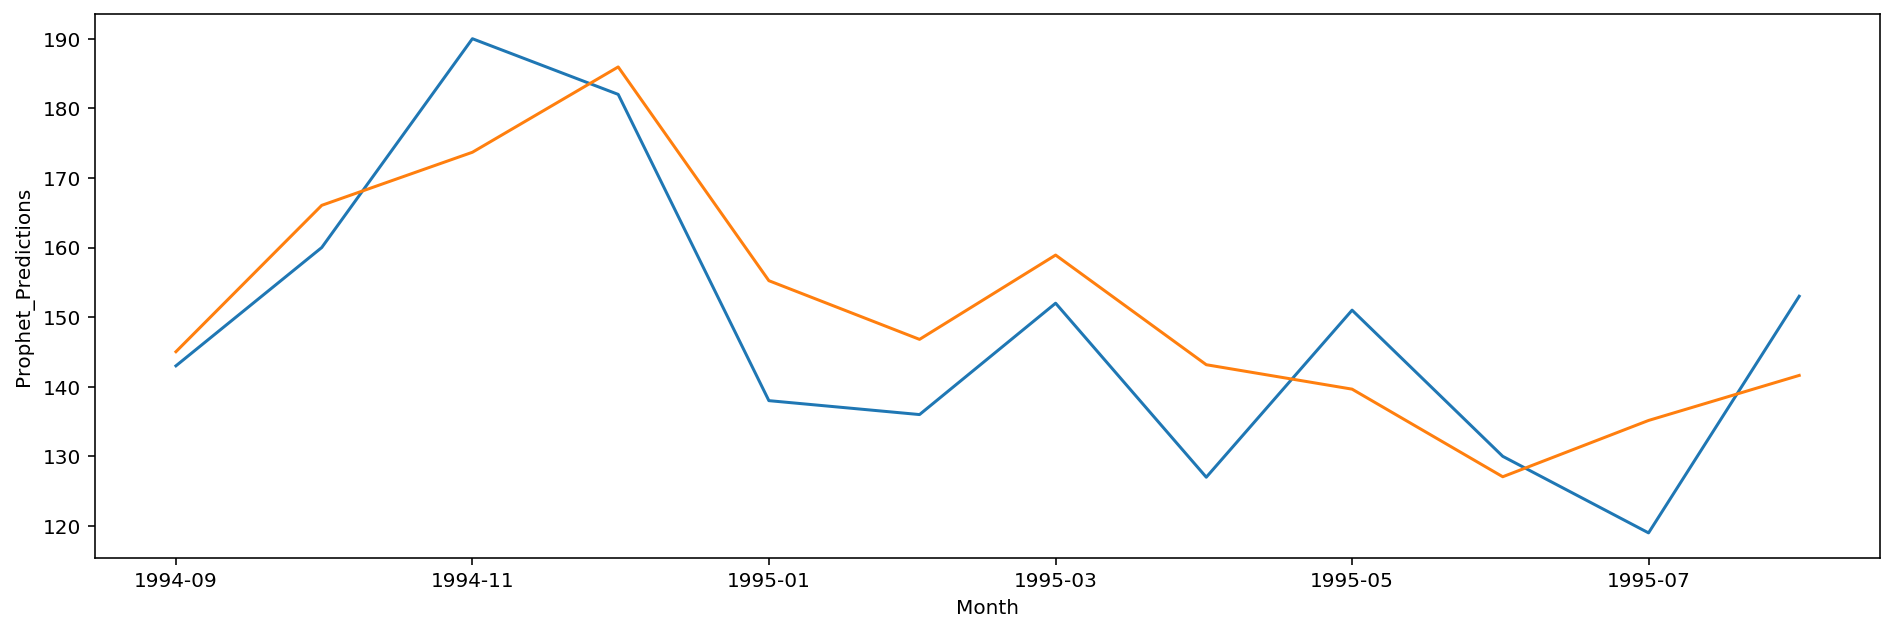

In [18]:
test_data["Prophet_Predictions"] = prophet_pred['Pred'].values
import seaborn as sns
plt.figure(figsize=(16,5))
ax = sns.lineplot(x= test_data.index, y=test_data["Monthly_Prod"])
sns.lineplot(x=test_data.index, y = test_data["Prophet_Predictions"]);

In [19]:
prophet_rmse_error = rmse(test_data['Monthly_Prod'], test_data["Prophet_Predictions"])
prophet_mse_error = prophet_rmse_error**2
mean_value = df['Monthly_Prod'].mean()

print(f'MSE Error: {prophet_mse_error}\nRMSE Error: {prophet_rmse_error}\nMean: {mean_value}')

MSE Error: 131.0810759981563
RMSE Error: 11.44906441584448
Mean: 136.39537815126045


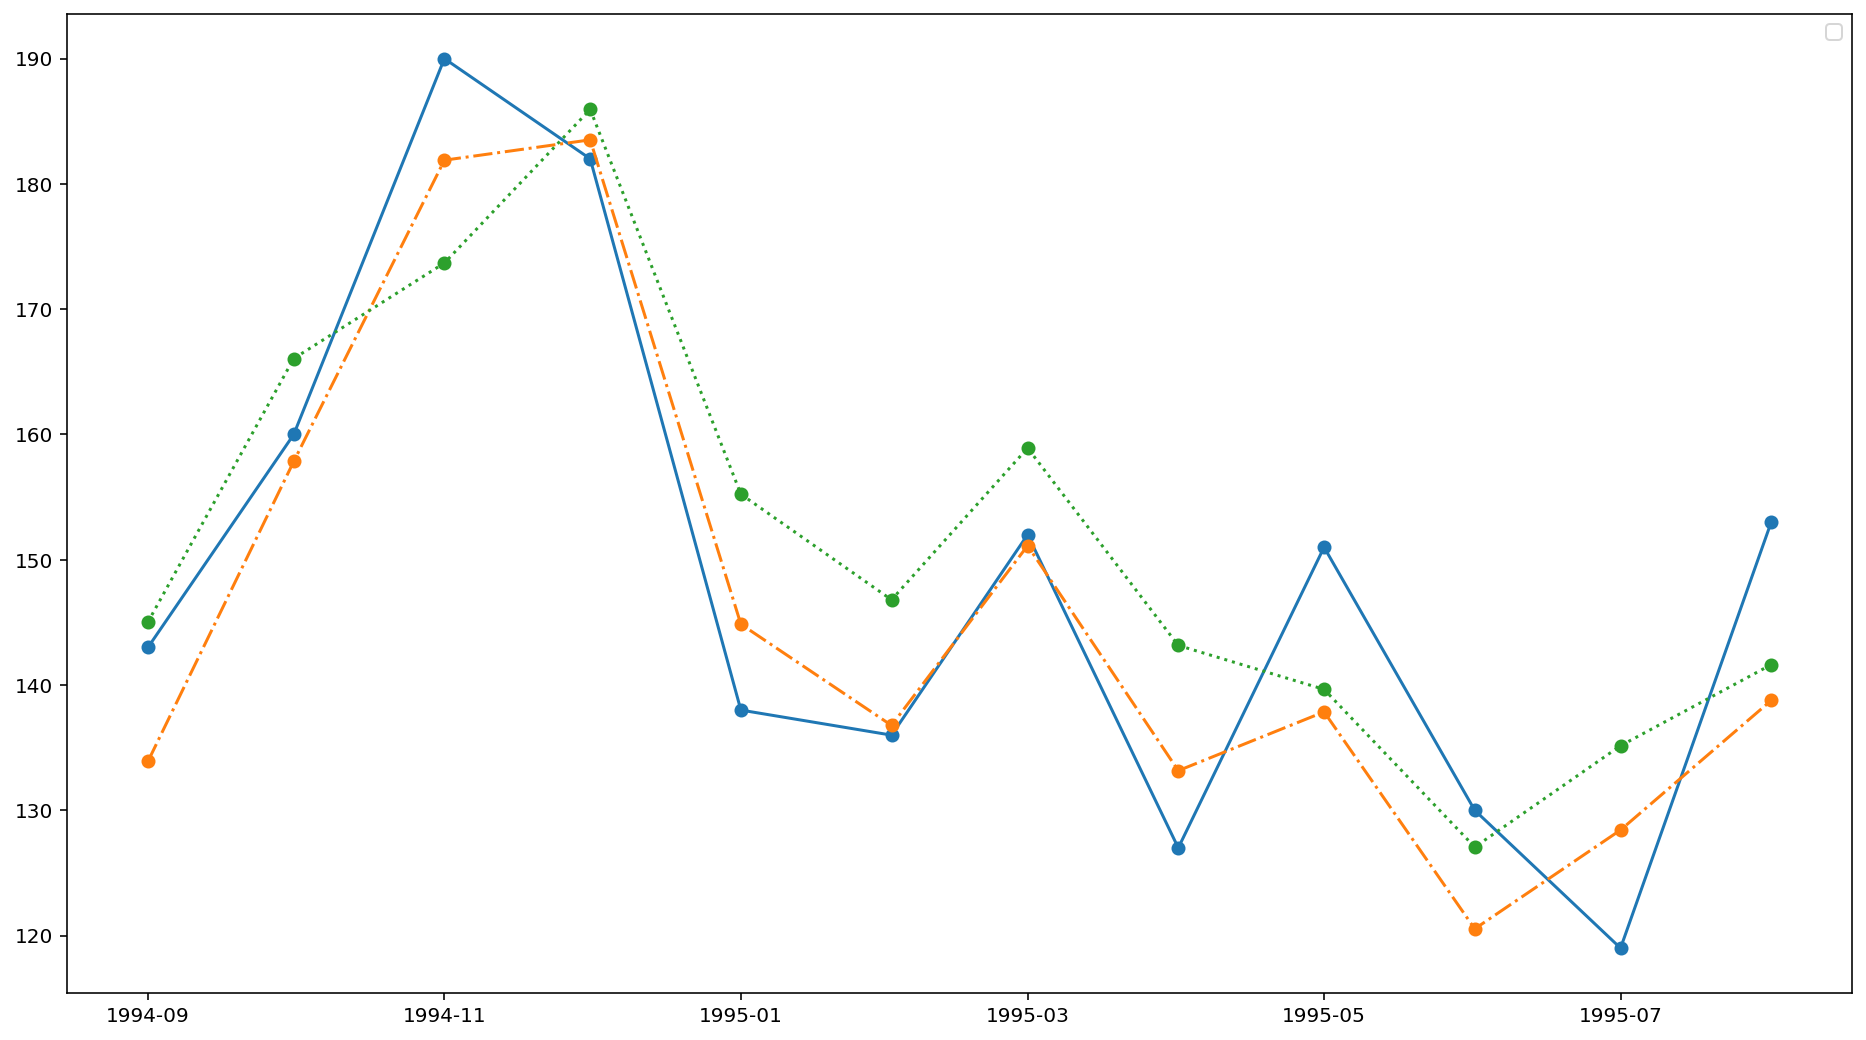

In [20]:
#Comparison

rmse_errors = [arima_rmse_error, prophet_rmse_error]
mse_errors = [arima_mse_error, prophet_mse_error]
errors = pd.DataFrame({"Models" : ["ARIMA", "Prophet"],"RMSE Errors" : rmse_errors, "MSE Errors" : mse_errors})
plt.figure(figsize=(16,9))
plt.plot_date(test_data.index, test_data["Monthly_Prod"], linestyle="-")
plt.plot_date(test_data.index, test_data["ARIMA_Predictions"], linestyle="-.")
plt.plot_date(test_data.index, test_data["Prophet_Predictions"], linestyle=":")
plt.legend()
plt.show()

In [21]:
print(f"Mean: {test_data['Monthly_Prod'].mean()}")
errors

Mean: 148.41666666666666


,Models,RMSE Errors,MSE Errors
0,ARIMA,8.141584,66.285392
1,Prophet,11.449064,131.081076


In [22]:
#Final Prediction data
test_data

,Monthly_Prod,ARIMA_Predictions,Prophet_Predictions
Month,,,
1994-09-01,143.0,133.901284,145.029744
1994-10-01,160.0,157.846290,166.060188
1994-11-01,190.0,181.891142,173.687007
1994-12-01,182.0,183.514877,185.945055
1995-01-01,138.0,144.856134,155.233328
1995-02-01,136.0,136.777627,146.803577
1995-03-01,152.0,151.124454,158.915612
1995-04-01,127.0,133.163644,143.161506
1995-05-01,151.0,137.856397,139.651658
